In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
import pickle

In [13]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Phân tích biểu đồ Box-plot các biến input (nhóm định lượng) theo biến mục tiêu

In [14]:
# Danh sách các cột input
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

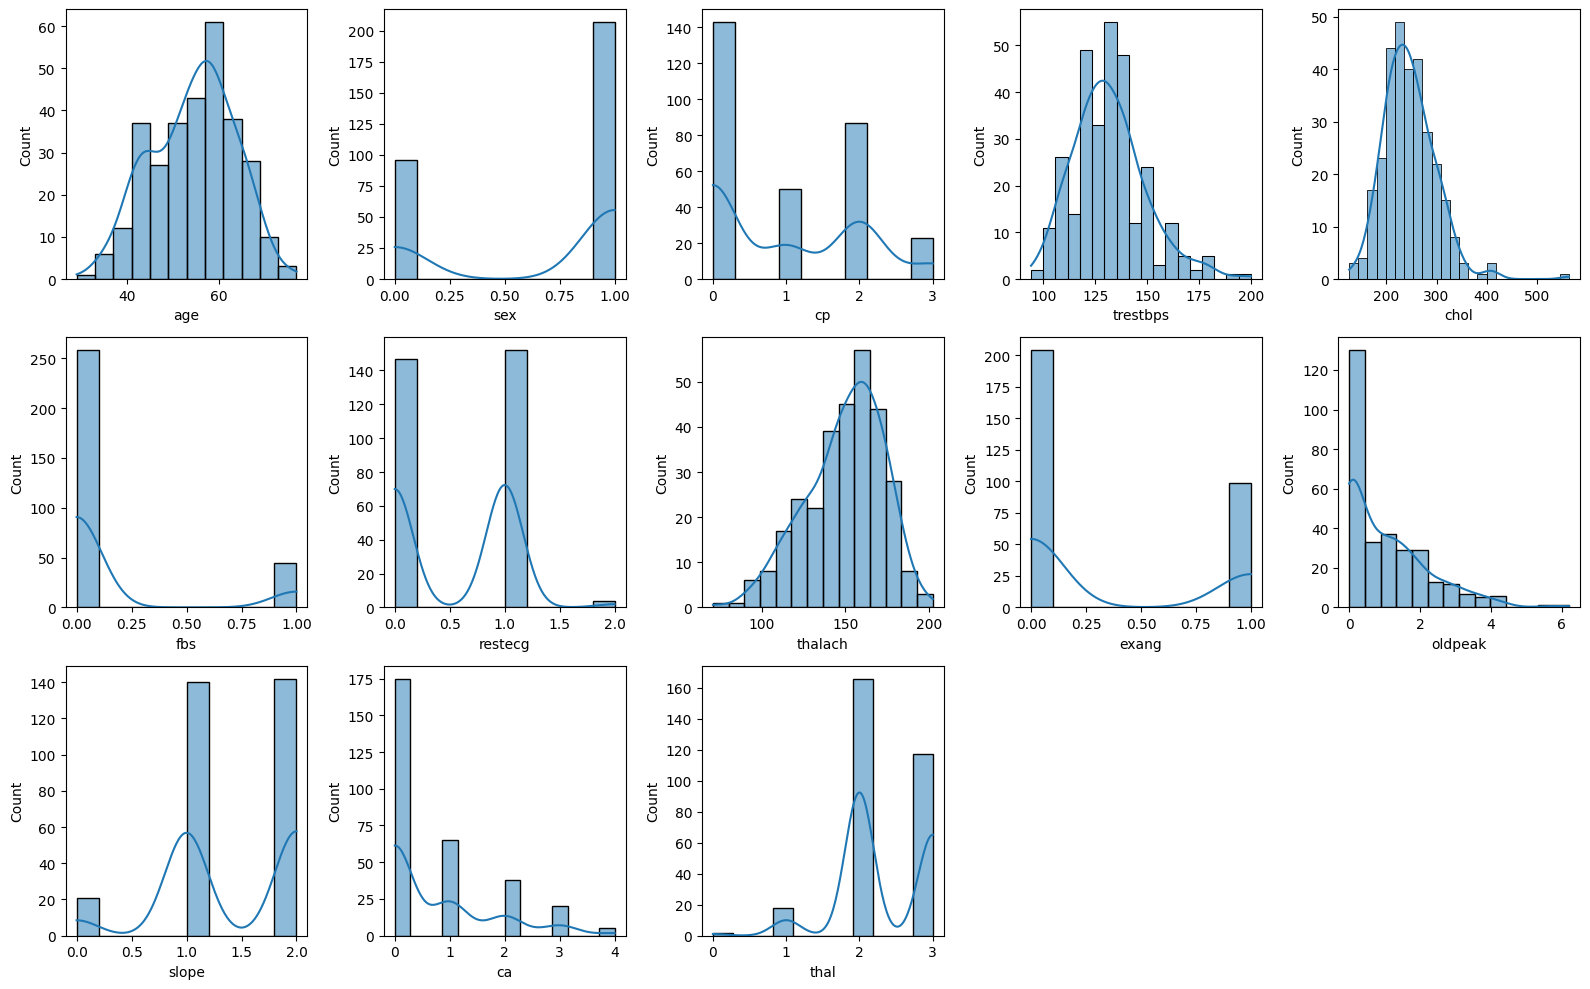

In [15]:
# Phân tích phân khối các biến số input

fig = plt.figure(figsize=(16,10))

# Lặp qua từng cột trong danh sách columns_eda
for i in range(len(columns_eda)):
    colname = columns_eda[i]  # Lấy tên cột tại vị trí i
    sub = fig.add_subplot(3, 5, i+1)  # Thêm một subplot vào figure (3 hàng, 5 cột)
    sns.histplot(data=df, x=colname, kde=True)  # Vẽ biểu đồ phân phối (histogram) với KDE
    
plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()  # Hiển thị biểu đồ

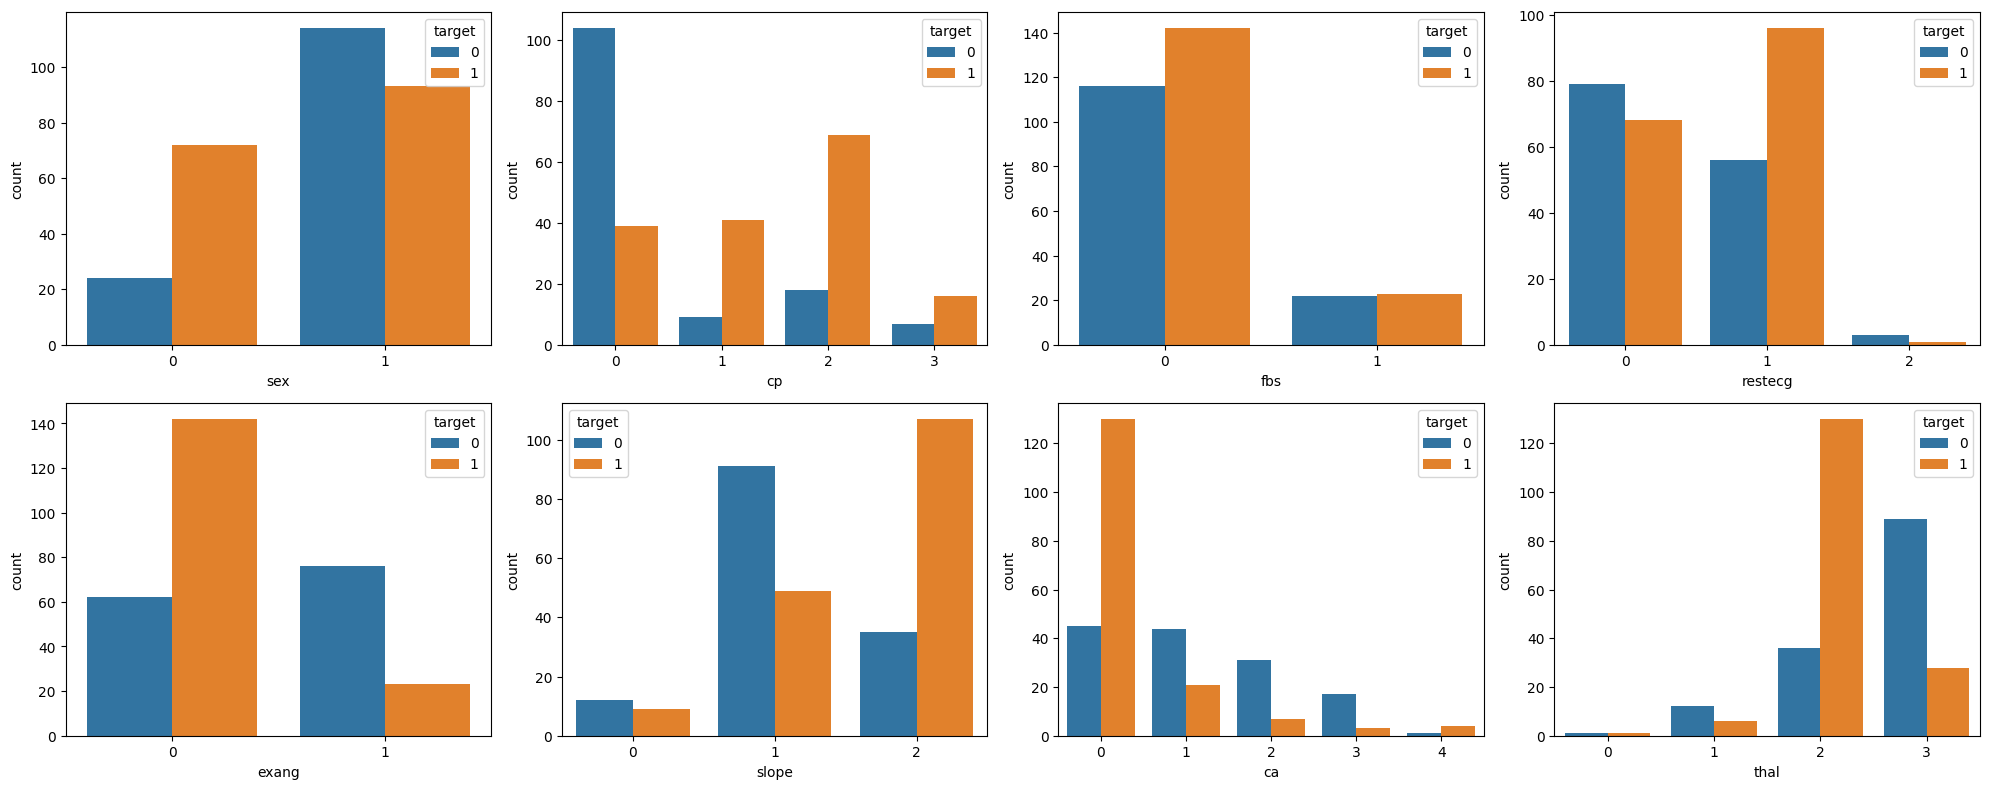

In [16]:
# Đếm xem số lượng các biến input (nhóm định tính) theo biến mục tiêu
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,8))

for i in range(len(categories_list)):
    colname = categories_list[i]  # Lấy tên cột từ danh sách
    sub = fig.add_subplot(2, 4, i+1)  # Thêm subplot vào figure với lưới 2 hàng 4 cột
    sns.countplot(data=df, x=colname, hue="target")  # Vẽ biểu đồ countplot cho từng cột và phân biệt theo "target"

plt.tight_layout()  # Điều chỉnh layout để không bị chồng lấn
plt.show()  # Hiển thị biểu đồ


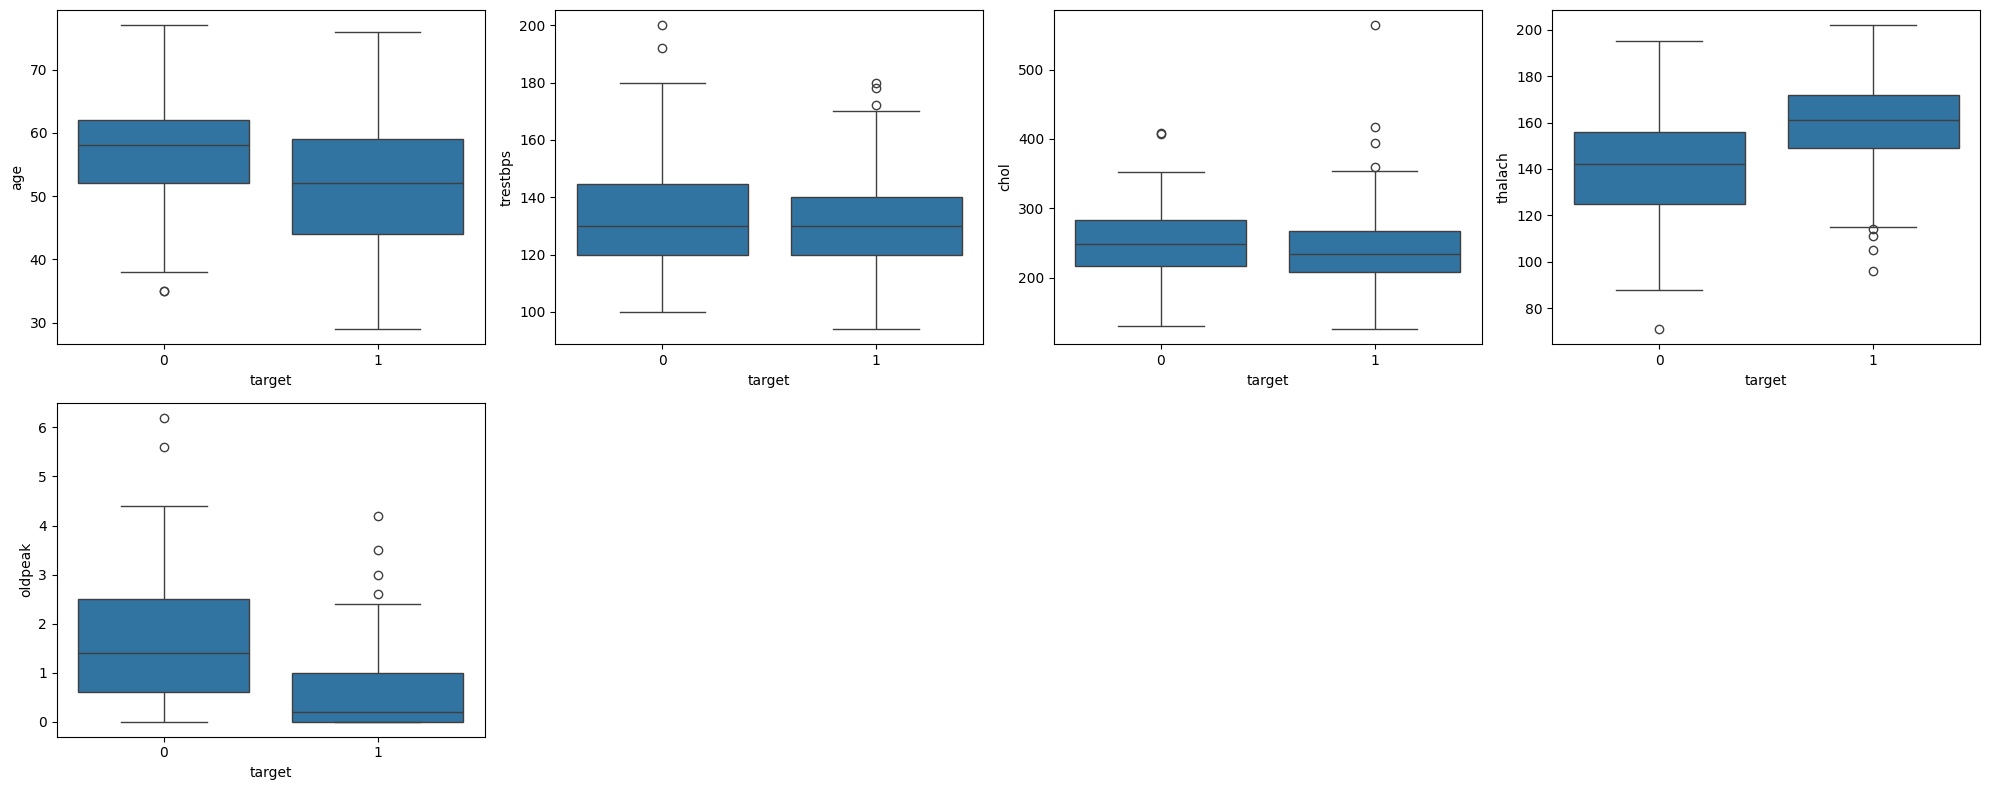

In [17]:
# Phân tích biểu đồ Box-plot các biến input (nhóm định lượng) theo biến mục tiêu
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20,8))

for i in range(len(numeric_list)):
    colname = numeric_list[i]  # Lấy tên cột hiện tại từ danh sách
    sub = fig.add_subplot(2, 4, i+1)  # Thêm subplot vào figure với lưới 2 hàng và 4 cột
    sns.boxplot(data=df, y=colname, x="target")  # Vẽ biểu đồ boxplot cho từng cột, phân theo "target"

plt.tight_layout()  # Điều chỉnh layout cho gọn gàng
plt.show()  # Hiển thị biểu đồ


### Xây dựng mô hình

In [18]:
# Chuẩn bị dữ liệu
X = df.iloc[:, :-1].values  # Lấy tất cả các cột trừ cột cuối cùng (cột 'target') để làm đặc trưng
y = df[['target']].values   # Lấy cột 'target' để làm nhãn
X = X.astype(float)         # Chuyển đổi các giá trị của X thành kiểu float
y = y.astype(float)         # Chuyển đổi các giá trị của y thành kiểu float



In [19]:
# Phân chia tập dữ liệu thành hai phần train và test

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình KNN với 8 hàng xóm và thuật toán "ball_tree"
knn = KNeighborsClassifier(n_neighbors=8, algorithm="ball_tree")

# Huấn luyện mô hình trên tập huấn luyện
knn.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [20]:
# Đánh giá mô hình trên tập test bằng độ đo accuracy
knn.score(X_test, y_test) * 100
# Phép đo accuracy đạt 68.9%

68.85245901639344

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

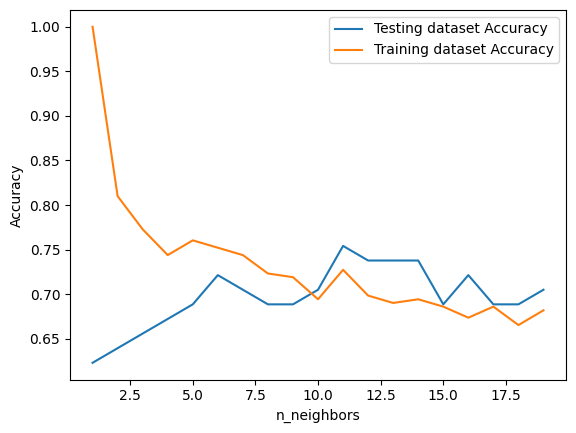

In [21]:
# Sử dụng độ đo đánh giá accuracy trên tập train và test để so sánh và chọn lựa K bao
# nhiêu là tốt nhất cho mô hình K-NN. Sinh viên nhìn biểu đồ để trả lời

# Tạo danh sách các giá trị K từ 1 đến 19
neighbors = np.arange(1, 20)

# Tạo mảng rỗng để lưu trữ độ chính xác của tập huấn luyện và tập kiểm tra
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Lặp qua các giá trị của K
for i, k in enumerate(neighbors):
    # Khởi tạo mô hình KNN với K hàng xóm
    knn = KNeighborsClassifier(n_neighbors=k)
    # Huấn luyện mô hình với tập huấn luyện
    knn.fit(X_train, y_train)

    # Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra
    train_accuracy[i] = knn.score(X_train, y_train)  # Độ chính xác trên tập huấn luyện
    test_accuracy[i] = knn.score(X_test, y_test)     # Độ chính xác trên tập kiểm tra

# Vẽ biểu đồ so sánh độ chính xác của tập huấn luyện và tập kiểm tra
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')

# Thêm các thành phần biểu đồ
plt.legend()            # Hiển thị chú thích
plt.xlabel('n_neighbors')  # Nhãn trục x
plt.ylabel('Accuracy')     # Nhãn trục y
plt.show()              # Hiển thị biểu đồ


Nhìn vào biểu đồ ta thấy khoảng K là từ 10 trở lên là tốt.
Tốt nhất là 11

In [22]:
# Khởi tạo mô hình KNN với K hàng xóm
knn = KNeighborsClassifier(n_neighbors=11)
# Huấn luyện mô hình với tập huấn luyện
knn.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [23]:
# In ra danh sách khoảng cách và các hàng xóm từ các mẫu dữ liệu trong tập test từ mô hình
# ở câu 5
# Lấy danh sách khoảng cách và chỉ số của các hàng xóm từ tập kiểm tra
distances, indices = knn.kneighbors(X_test)

# In ra khoảng cách và các hàng xóm gần nhất
for i, (dist, ind) in enumerate(zip(distances, indices)):
    print(f"Mẫu {i}:")
    print(f"Khoảng cách đến hàng xóm gần nhất: {dist}")
    print(f"Chỉ số các hàng xóm: {ind}")
    print("-------------------------------")


Mẫu 0:
Khoảng cách đến hàng xóm gần nhất: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]
Chỉ số các hàng xóm: [  1  79 161 222 211  25 217 166 103 111  88]
-------------------------------
Mẫu 1:
Khoảng cách đến hàng xóm gần nhất: [20.96759404 21.51650529 26.15415837 27.35616932 27.89336839 28.93095228
 31.43580761 32.57299495 34.21461676 35.98555266 36.39725264]
Chỉ số các hàng xóm: [179 101  89  70 167  92   7 149 114 221 172]
-------------------------------
Mẫu 2:
Khoảng cách đến hàng xóm gần nhất: [46.55276576 46.92589903 53.2169146  54.00962877 54.00962877 54.46503466
 61.48788499 61.61980201 61.91413409 62.66450351 62.98761783]
Chỉ số các hàng xóm: [195 148 147  34  19 106 176 216 158  98 100]
-------------------------------
Mẫu 3:
Khoảng cách đến hàng xóm gần nhất: [15.49870962 18.20466973 18.77471704 56.31349749 58.30686066 58.89388763
 68.9890571  70.70509175 73.89594035 75.21043811 78.14224

In [24]:
# Lấy khoảng cách và chỉ số của hàng xóm gần nhất cho mẫu đầu tiên trong tập kiểm tra
distances_first_sample = distances[0]
indices_first_sample = indices[0]

# In ra thông tin cho mẫu đầu tiên
print(f"Các dòng gần nhất trong tập huấn luyện cho mẫu đầu tiên: {indices_first_sample}")
print(f"Khoảng cách tương ứng theo độ đo Euclidean: {distances_first_sample}")


Các dòng gần nhất trong tập huấn luyện cho mẫu đầu tiên: [  1  79 161 222 211  25 217 166 103 111  88]
Khoảng cách tương ứng theo độ đo Euclidean: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]


In [25]:
sample_input = np.array([[47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]])

# Sử dụng mô hình KNN để tìm K hàng xóm gần nhất và khoảng cách tương ứng
distances_sample_input, indices_sample_input = knn.kneighbors(sample_input)

# In ra các hàng xóm gần nhất và khoảng cách tương ứng
print("K hàng xóm gần nhất trong tập huấn luyện là các dòng:")
print(indices_sample_input)

print("\nKhoảng cách tương ứng theo độ đo Euclidean là:")
print(distances_sample_input)

K hàng xóm gần nhất trong tập huấn luyện là các dòng:
[[168   2 180  11  94  62 172 213  67  66 189]]

Khoảng cách tương ứng theo độ đo Euclidean là:
[[16.1322658  20.65453945 21.38340478 21.39649504 22.11537926 23.02194605
  23.09567059 23.23790008 23.89748941 24.4705946  24.58149711]]


In [26]:
# Xem danh sách các giá trị của lớp đánh nhãn của biến output (target) nhằm xác định bệnh
# nhân có bệnh hay không
classes = knn.classes_
classes

array([0., 1.])

In [27]:
# Tính toán xác suất dự báo cho tập kiểm tra
y_test_score = knn.predict_proba(X_test)

# In ra danh sách xác suất dự báo cho các nhãn
print("Xác suất dự báo cho các mẫu trong tập test:")
print(y_test_score)


Xác suất dự báo cho các mẫu trong tập test:
[[1.         0.        ]
 [0.45454545 0.54545455]
 [0.45454545 0.54545455]
 [0.45454545 0.54545455]
 [0.63636364 0.36363636]
 [0.18181818 0.81818182]
 [0.36363636 0.63636364]
 [0.63636364 0.36363636]
 [0.72727273 0.27272727]
 [0.27272727 0.72727273]
 [0.63636364 0.36363636]
 [0.45454545 0.54545455]
 [0.18181818 0.81818182]
 [0.54545455 0.45454545]
 [0.18181818 0.81818182]
 [0.18181818 0.81818182]
 [0.18181818 0.81818182]
 [0.54545455 0.45454545]
 [0.72727273 0.27272727]
 [0.54545455 0.45454545]
 [0.45454545 0.54545455]
 [0.81818182 0.18181818]
 [0.72727273 0.27272727]
 [0.36363636 0.63636364]
 [0.45454545 0.54545455]
 [0.27272727 0.72727273]
 [0.72727273 0.27272727]
 [0.         1.        ]
 [0.63636364 0.36363636]
 [0.36363636 0.63636364]
 [0.90909091 0.09090909]
 [0.90909091 0.09090909]
 [0.90909091 0.09090909]
 [0.09090909 0.90909091]
 [0.54545455 0.45454545]
 [0.63636364 0.36363636]
 [0.18181818 0.81818182]
 [0.09090909 0.90909091]
 [0.  

Câu 11: Nhãn thứ 2  [0.45454545 0.54545455], 54% nhận giá trị 1; lớn hơn 50%
Nên nhãn 2 là 1

In [28]:
# Liệt kê danh sách các nhãn dự báo thông qua mô hình của các mẫu dữ liệu input trong tập
# test. Hãy cho biết kết quả dự báo của mẫu input thứ 5 trong tập test sẽ được dự báo là bao
# nhiêu?

y_test_predicted = knn.predict(X_test)
y_test_predicted

# Input thứ 5 output sẽ là 0. Tất là không bệnh

array([0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [29]:
# Hãy cho biết nếu điều chỉnh ngưỡng xác suất (threshold) đưa ra quyết định là 0.65 thì kết
# quả dự báo của mẫu input số hai và mẫu số năm và mẫu số sáu là bao nhiêu

# Điều chỉnh ngưỡng xác suất để phân loại
y_pred_test_new_threshold = (knn.predict_proba(X_test)[:, 1] >= 0.65).astype(float)

# In ra kết quả dự báo cho mẫu số 2, số 5 và số 6
print("Kết quả dự báo với ngưỡng 0.65 cho mẫu số 2:", y_pred_test_new_threshold[1])
print("Kết quả dự báo với ngưỡng 0.65 cho mẫu số 5:", y_pred_test_new_threshold[4])
print("Kết quả dự báo với ngưỡng 0.65 cho mẫu số 6:", y_pred_test_new_threshold[5])


Kết quả dự báo với ngưỡng 0.65 cho mẫu số 2: 0.0
Kết quả dự báo với ngưỡng 0.65 cho mẫu số 5: 0.0
Kết quả dự báo với ngưỡng 0.65 cho mẫu số 6: 1.0


In [30]:
# Hãy đánh giá mô hình trên tập test qua Confussion – Matrix

# Dự đoán nhãn cho tập kiểm tra
y_test_predicted = knn.predict(X_test)

# Tính toán ma trận nhầm lẫn
cfmx = confusion_matrix(y_test, y_test_predicted)

# In ra ma trận nhầm lẫn
print("Confusion Matrix:")
print(cfmx)

Confusion Matrix:
[[20  9]
 [ 6 26]]


Dự đoán quan trọng nhất là FN = 6
Vì trong khi thực tế đoán bệnh, mô hình đoán không bệnh

In [31]:
def myscores(smat): 
    tp = smat[1][1] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[0][0] 
    vprecision = tp/(tp+fp)
    vrecall = tp/(tp+fn)
    vf1 = 2*(vprecision*vrecall)/(vprecision+vrecall) 

    return vprecision,vrecall,vf1
print("precision, recall, f1:", myscores(cfmx))

precision, recall, f1: (np.float64(0.7428571428571429), np.float64(0.8125), np.float64(0.7761194029850748))


Recall quan trọng nhất vì mình cần giảm FN xuống thì recall càng cao càng tốt

In [32]:
# In ra bảng báo cáo các đại lượng đánh giá cho mô hình
print(classification_report(y_test, y_test_predicted))


              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


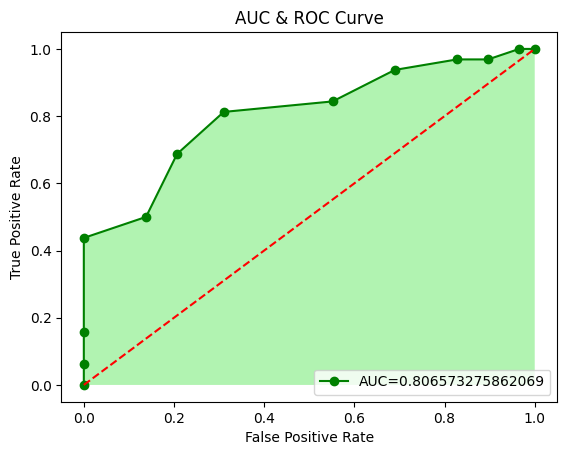

In [33]:
# Huấn luyện mô hình KNN (giả sử X_train, y_train, X_test, y_test đã được chuẩn bị trước đó)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

# Bước 2: Dự đoán xác suất cho tập kiểm tra
# Tính xác suất dự đoán thuộc nhãn 1
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Bước 3: Tính toán các giá trị ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Bước 4: Tính AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Bước 5: Vẽ đồ thị ROC Curve
plt.figure()
plt.plot(fpr, tpr, 'go-', label="AUC=" + str(auc))  # Vẽ ROC Curve
plt.plot([0, 1], [0, 1], 'r--')  # Đường chéo biểu thị mô hình ngẫu nhiên
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')  # Nhãn trục X
plt.ylabel('True Positive Rate')  # Nhãn trục Y
plt.legend(loc=4)  # Vị trí của chú thích (legend)

# Điền màu cho vùng dưới đường ROC Curve
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)

# Hiển thị đồ thị
plt.show()

AUC = 0.81, cho thấy mô hình có khả năng phân loại đúng phần lớn các mẫu

Confusion Matrix:
[[25  4]
 [16 16]]
Precision: 0.8
Recall: 0.5
F1 Score: 0.6153846153846154


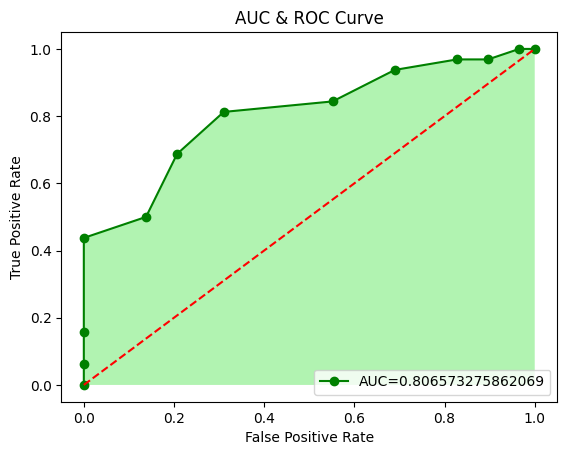

array([0.        , 0.54545455, 0.54545455, 0.54545455, 0.36363636,
       0.81818182, 0.63636364, 0.36363636, 0.27272727, 0.72727273,
       0.36363636, 0.54545455, 0.81818182, 0.45454545, 0.81818182,
       0.81818182, 0.81818182, 0.45454545, 0.27272727, 0.45454545,
       0.54545455, 0.18181818, 0.27272727, 0.63636364, 0.54545455,
       0.72727273, 0.27272727, 1.        , 0.36363636, 0.63636364,
       0.09090909, 0.09090909, 0.09090909, 0.90909091, 0.45454545,
       0.36363636, 0.81818182, 0.90909091, 1.        , 0.81818182,
       0.63636364, 0.63636364, 0.36363636, 0.90909091, 0.81818182,
       0.45454545, 0.72727273, 0.81818182, 0.54545455, 0.63636364,
       0.45454545, 0.63636364, 0.27272727, 0.63636364, 0.72727273,
       0.45454545, 0.36363636, 0.72727273, 0.18181818, 0.72727273,
       0.45454545])

In [34]:
# Import các thư viện cần thiết
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Bước 1: Dự đoán nhãn cho tập kiểm tra với threshold = 0.65
y_test_predicted = (knn.predict_proba(X_test)[:, 1] >= 0.65).astype(float)

# Bước 2: Tính toán ma trận nhầm lẫn
cfmx = confusion_matrix(y_test, y_test_predicted)

# In ra ma trận nhầm lẫn
print("Confusion Matrix:")
print(cfmx)

# Bước 3: Tính toán và in các chỉ số precision, recall và F1-score
precision = precision_score(y_test, y_test_predicted)
recall = recall_score(y_test, y_test_predicted)
f1 = f1_score(y_test, y_test_predicted)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Bước 4: Vẽ đồ thị AUC & ROC Curve
y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Xác suất dự đoán thuộc nhãn 1
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Vẽ ROC Curve
plt.figure()
plt.plot(fpr, tpr, 'go-', label="AUC=" + str(auc))
plt.plot([0, 1], [0, 1], 'r--')  # Đường chéo biểu thị mô hình ngẫu nhiên
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()


# Threshold tăng: Precision tăng, Recall giảm.
# Threshold giảm: Recall tăng, Precision giảm.
knn.predict_proba(X_test)[:, 1]

In [35]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Chuẩn bị dữ liệu
X = df.iloc[:, :-1].values  # Lấy tất cả các cột trừ cột cuối cùng (cột 'target') để làm đặc trưng
y = df[['target']].values   # Lấy cột 'target' để làm nhãn
X = X.astype(float)         # Chuyển đổi các giá trị của X thành kiểu float
y = y.astype(float)         # Chuyển đổi các giá trị của y thành kiểu float

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình KNN với 8 hàng xóm và thuật toán "ball_tree"
knn = KNeighborsClassifier(n_neighbors=11, algorithm="ball_tree")


# Huấn luyện mô hình trên tập huấn luyện
knn.fit(X_train, y_train)

pickle.dump(knn, open('model_KNN_Heart.sav', 'wb'))

# Tải mô hình đã được huấn luyện từ file
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))

# Nhập các đặc trưng đầu vào từ người dùng
v1 = float(input('Nhập tuổi (age): '))
v2 = float(input('Nhập giới tính (sex - 0: Nữ, 1: Nam): '))
v13 = float(input('Nhập kiểu đau ngực (cp - 0-3): '))
v3 = float(input('Nhập huyết áp khi nghỉ (trestbps): '))
v4 = float(input('Nhập mức cholesterol (chol): '))
v5 = float(input('Nhập đường huyết đói (fbs - 0: <120mg/dl, 1: >120mg/dl): '))
v6 = float(input('Nhập kết quả điện tâm đồ (restecg - 0-2): '))
v7 = float(input('Nhập nhịp tim tối đa (thalach): '))
v8 = float(input('Nhập bài kiểm tra đau thắt ngực (exang - 0: Không, 1: Có): '))
v9 = float(input('Nhập độ chênh của ST (oldpeak): '))
v10 = float(input('Nhập độ dốc của ST (slope - 0-2): '))
v11 = float(input('Nhập số mạch máu chính được chụp (ca - 0-3): '))
v12 = float(input('Nhập loại thalassemia (thal - 1: Bình thường, 2: Tật, 3: Giảm): '))

# Nhập threshold từ người dùng (nếu không nhập, sử dụng mặc định là 0.5)
threshold_input = input('Nhập ngưỡng xác suất phân lớp (threshold, mặc định là 0.5): ')
threshold = float(threshold_input) if threshold_input else 0.5

# Dự đoán xác suất của mẫu nhập vào
y_pred_proba = loaded_model.predict_proba([[v1, v2, v13, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12]])[0][1]

# Kiểm tra kết quả dự đoán với ngưỡng xác suất
if y_pred_proba >= threshold:
    print(f"Kết quả dự báo: Bị bệnh tim (Xác suất: {y_pred_proba:.2f})")
else:
    print(f"Kết quả dự báo: Không bị bệnh tim (Xác suất: {y_pred_proba:.2f})")


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: could not convert string to float: ''